In [21]:
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)


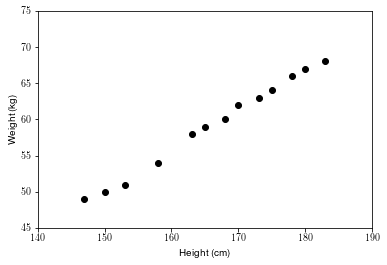

In [22]:
# for both python 2 and 3 
from __future__ import print_function
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages


# height (cm)
X = np.array([[147, 150, 153, 158, 163, 165, 168, 170, 173, 175, 178, 180, 183]]).T # each row is a point 
# weight (kg)
y = np.array([ 49, 50, 51,  54, 58, 59, 60, 62, 63, 64, 66, 67, 68])
# Visualize data 
plt.plot(X, y, 'ko')
plt.axis([140, 190, 45, 75])
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()

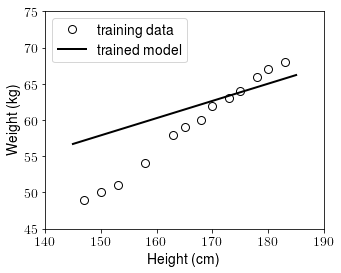

In [41]:
# Building Xbar 
one = np.ones((X.shape[0], 1))
Xbar = np.concatenate((one, X), axis = 1) # each point is one row 
# Calculating weights of the fitting line 
A = np.dot(Xbar.T, Xbar)
b = np.dot(Xbar.T, y)
w = np.dot(np.linalg.pinv(A), b)
# weights
w_0 = w[0]
w_1 = w[1]

x0 = np.linspace(145, 185, 2, endpoint=True)
y0 = w_0 + w_1*x0
plt.figure(figsize=(5,4))
# Drawing the fitting line 
plt.plot(X, y, 'o', color = 'white', mec = 'k', markersize = 8, label = "training data")     # data 
plt.plot(x0, y0, color = 'k', linewidth = 2, label = "trained model")           # the fitting line
plt.axis([140, 190, 45, 75]) # xmin, xmax, ymin, ymax 
plt.xlabel('Height (cm)', fontsize = 14)
plt.ylabel('Weight (kg)', fontsize = 14)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.legend(loc = "best", fontsize = 14) 
with PdfPages('lr_ex.pdf') as pdf:
    pdf.savefig(bbox_inches='tight')
plt.show()

In [24]:
y1 = w_1*155 + w_0
y2 = w_1*160 + w_0

print('Input 155cm, true output 52kg, predicted output %.2fkg'  %(y1) )
print('Input 160cm, true output 56kg, predicted output %.2fkg'  %(y2) )


Input 155cm, true output 52kg, predicted output 52.94kg
Input 160cm, true output 56kg, predicted output 55.74kg


Chúng ta thấy rằng kết quả dự đoán khá gần với số liệu thực tế.

Tiếp theo, chúng ta sẽ sử dụng thư viện Scikit-learn của Python để tìm nghiệm. 

In [25]:
from sklearn import datasets, linear_model

# fit the model by Linear Regression
regr = linear_model.LinearRegression() 
regr.fit(X, y) # in scikit-learn, each sample is one row 

# Compare two results
print("scikit-learn's solution  : w_1 = ", regr.coef_[0], "w_0 = ", regr.intercept_)
print("our solution             : w_1 = ", w[1], "w_0 = ", w[0])

scikit-learn's solution  : w_1 =  0.5592049619396674 w_0 =  -33.73541020580774
our solution             : w_1 =  0.5592049619395709 w_0 =  -33.735410205790686


Chúng ta thấy rằng hai kết quả thu được như nhau! (_Nghĩa là tôi đã không mắc lỗi nào trong cách tìm nghiệm ở phần trên_)

### Linear Regression rất nhạy cảm với nhiễu
Trong trường hợp có _nhiễu_, với một cặp dữ liệu (150 cm, 70kg), kết quả đã sai lệch đi rất nhiều.


w =  [22.21867545  0.23775985]


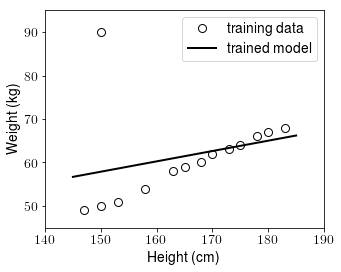

In [40]:
import numpy as np 
import matplotlib.pyplot as plt

# height (cm)
X = np.array([[147, 150, 153, 158, 163, 165, 168, 170, 173, 175, 178, 180, 183, 150]]).T
# weight (kg)
y = np.array([ 49, 50, 51,  54, 58, 59, 60, 62, 63, 64, 66, 67, 68, 90])

# Building Xbar 
one = np.ones((X.shape[0], 1))
Xbar = np.concatenate((one, X), axis = 1)

# Calculating weights of the fitting line 
A = np.dot(Xbar.T, Xbar)
b = np.dot(Xbar.T, y)
w = np.dot(np.linalg.pinv(A), b)
print('w = ', w)
# Preparing the fitting line 
w_0 = w[0]
w_1 = w[1]
x0 = np.linspace(145, 185, 2, endpoint=True)
y0 = w_0 + w_1*x0

# Drawing the fitting line 
# plt.plot(X, y, 'ro')     # data 
# plt.plot(x0, y0)               # the fitting line
plt.figure(figsize=(5,4))
plt.plot(X, y, 'o', color = 'white', mec = 'k', markersize = 8, label = "training data")     # data 
plt.plot(x0, y0, color = 'k', linewidth = 2, label = "trained model")           # the fitting line
plt.axis([140, 190, 45, 75]) # xmin, xmax, ymin, ymax 
plt.legend(loc = "best", fontsize = 14)

plt.axis([140, 190, 45, 95])
plt.xlabel('Height (cm)', fontsize = 14)
plt.ylabel('Weight (kg)', fontsize = 14)
plt.tick_params(axis='both', which='major', labelsize=14)
with PdfPages('noise.pdf') as pdf:
    pdf.savefig(bbox_inches='tight')
plt.show()


# Polynomial Regression 

In [27]:

from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

(20, 1) (20, 1)


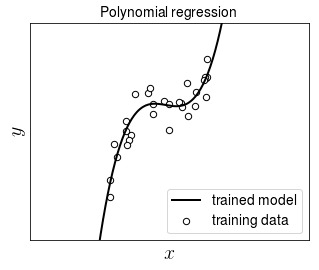

[[-70.86022078  78.7687132  -28.99387406   3.4286372 ]]


In [37]:

# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt
np.random.seed(4)
from sklearn import datasets, linear_model
from matplotlib.backends.backend_pdf import PdfPages

N = 30
N_test = 20 
X = np.random.rand(N, 1)*5
y = 3*(X -2) * (X - 3)*(X-4) +  10*np.random.randn(N, 1)

X_test = (np.random.rand(N_test,1) - 1/2) *2
y_test = 3*(X_test -2) * (X_test - 3)*(X_test-4) +  10*np.random.randn(N_test, 1)

def buildX(X, d = 2):
    res = np.ones((X.shape[0], 1))
    for i in xrange(1, d+1):
        res = np.concatenate((res, X**i), axis = 1)
    return res 

def myfit(X, y, d):
    Xbar = buildX(X, d)
    regr = linear_model.LinearRegression(fit_intercept=False) # fit_intercept = False for calculating the bias
    regr.fit(Xbar, y)

    w = regr.coef_
    # Display result
    w_0 = w[0][0]
    w_1 = w[0][1]
    x0 = np.linspace(-1, 7, 200, endpoint=True)
    y0 = np.zeros_like(x0)
    ytrue = 5*(x0 - 2)*(x0-3)*(x0-4)
    for i in xrange(d+1):
        y0 += w[0][i]*x0**i
    plt.figure(figsize=(5,4))
    # Draw the fitting line 
    with PdfPages('polyreg.pdf') as pdf:
        plt.scatter(X.T, y.T, c = 'w', s = 40, edgecolors = 'k', label = "training data")     # data 
        print(X_test.shape, y_test.shape)
    #     plt.scatter(X_test.T, y_test.T, c = 'y', s = 40, label = 'Test samples')     # data 

        l1, = plt.plot(x0, y0, 'k', linewidth = 2, label="trained model")   # the fitting line
        plt.legend(handles = [l1], fontsize = 18)
    #     plt.plot(x0, ytrue, 'b', linewidth = 2, label = "train model")   # the fitting line
        plt.xticks([], [])
        plt.yticks([], [])


        plt.title('Polynomial regression', fontsize = 14)
        plt.axis([-4, 10, np.amax(y_test)-100, np.amax(y) + 30])
        plt.legend(loc="lower right", fontsize = 14)

        fn = 'linreg_' + str(d) + '.png'

        plt.xlabel('$x$', fontsize = 20);
        plt.ylabel('$y$', fontsize = 20);

        pdf.savefig(bbox_inches='tight') #, dpi = 600)

        plt.show()
    print(w)

myfit(X, y, 3)
